In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="45c70fb09fc558f102d1f22789c7d648dbb40a57"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('AAPL.csv')


In [ ]:
df1=df.reset_index()['close']

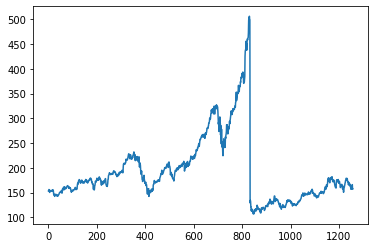

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 284ms/step - loss: 0.0187 - val_loss: 6.0913e-04
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0022 - val_loss: 6.6552e-04
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0014 - val_loss: 3.7753e-04
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0012 - val_loss: 2.9881e-04
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0011 - val_loss: 2.9904e-04
Epoch 7/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0012 - val_loss: 3.6486e-04
Epoch 8/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0011 - val_loss: 2.7634e-04
Epoch 9/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0010 - val_loss: 2.8195e-04
Epoch 10/100
12/12 [==============================] - 2s 18

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

227.05019281414866

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

149.60852810512884

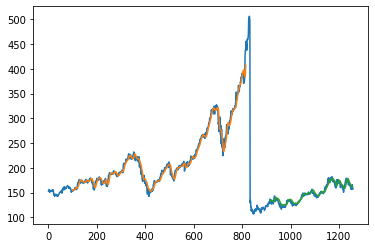

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13390225]
101
1 day input [0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.